In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
import tensorflow as tf

In [9]:
df = pd.read_csv(r"data.csv")

In [11]:
df = df.drop(["Unnamed: 7", "YEAR", "MO", "DY"], axis = 1)

In [15]:
np.mean(df["PRECTOTCORR"])

2.434956808365535

In [28]:
df["PREC_CLSFCTN"] = [1 if i>0.1 else 0 for i in df["PRECTOTCORR"]] #threshold = mean/20 (arbitrary)

In [29]:
df["PREC_CLSFCTN"].value_counts()
#balanced

1    4625
0    4173
Name: PREC_CLSFCTN, dtype: int64

In [137]:
df

,T2M,RH2M,PS,PRECTOTCORR,YEAR-MO-DY,PREC_CLSFCTN
0,18.98,67.62,91.82,0.00,2000-01-01,0
1,18.82,65.62,91.83,0.00,2000-01-02,0
2,19.66,64.38,91.74,0.00,2000-01-03,0
3,20.43,64.19,91.72,0.00,2000-01-04,0
4,20.74,66.62,91.73,0.01,2000-01-05,0
...,...,...,...,...,...,...
8793,20.79,74.12,92.23,0.16,2024-01-28,1
8794,20.48,70.94,92.14,0.11,2024-01-29,1
8795,21.07,66.12,92.06,0.08,2024-01-30,0
8796,21.81,69.69,92.06,0.22,2024-01-31,1


<AxesSubplot:>

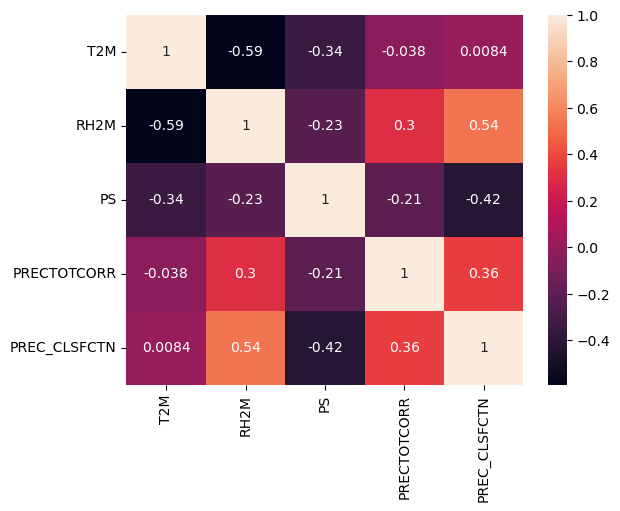

In [30]:
import seaborn as sns
sns.heatmap(df.corr(), annot = True)

In [31]:
import keras
import tensorflow as tf

In [33]:
from sklearn.model_selection import train_test_split as tts

In [126]:
X_train, X_test, y_train, y_test = tts(df.drop(["PRECTOTCORR", "PREC_CLSFCTN", "YEAR-MO-DY"], axis = 1), df["PREC_CLSFCTN"], test_size = 0.25)

In [127]:
X_train.iloc[0].shape

(3,)

In [128]:
model = keras.Sequential([
    #tf.keras.layers.Input(4,),
    tf.keras.layers.Dense(128, input_shape = (X_train.shape[1],), activation = "relu"),
    tf.keras.layers.Dense(128, activation = "relu"),
    tf.keras.layers.Dense(2, activation = 'sigmoid')
])

In [129]:
from keras.optimizers import Adam

In [130]:
opt = Adam(learning_rate = 0.01)

In [131]:
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = "accuracy")

In [132]:
y_train

1345    0
5762    1
3256    1
2598    0
3512    1
       ..
3650    1
7182    0
4725    0
65      0
8002    1
Name: PREC_CLSFCTN, Length: 6598, dtype: int64

In [133]:
model.fit(X_train, pd.get_dummies(y_train), epochs = 100)

Epoch 1/100
207/207 [==============================] - 2s 3ms/step - loss: 0.6808 - accuracy: 0.7663
Epoch 2/100
207/207 [==============================] - 1s 3ms/step - loss: 0.4378 - accuracy: 0.7995
Epoch 3/100
207/207 [==============================] - 1s 3ms/step - loss: 0.4271 - accuracy: 0.8062
Epoch 4/100
207/207 [==============================] - 1s 3ms/step - loss: 0.4274 - accuracy: 0.8077
Epoch 5/100
207/207 [==============================] - 1s 4ms/step - loss: 0.4514 - accuracy: 0.7969
Epoch 6/100
207/207 [==============================] - 1s 3ms/step - loss: 0.4403 - accuracy: 0.8005
Epoch 7/100
207/207 [==============================] - 1s 3ms/step - loss: 0.4331 - accuracy: 0.8065
Epoch 8/100
207/207 [==============================] - 1s 3ms/step - loss: 0.4227 - accuracy: 0.8127
Epoch 9/100
207/207 [==============================] - 1s 3ms/step - loss: 0.4191 - accuracy: 0.8145
Epoch 10/100
207/207 [==============================] - 1s 3ms/step - loss: 0.4176 - accura

207/207 [==============================] - 1s 3ms/step - loss: 0.4022 - accuracy: 0.8202
Epoch 82/100
207/207 [==============================] - 1s 3ms/step - loss: 0.4145 - accuracy: 0.8112
Epoch 83/100
207/207 [==============================] - 1s 4ms/step - loss: 0.3997 - accuracy: 0.8213
Epoch 84/100
207/207 [==============================] - 1s 3ms/step - loss: 0.3994 - accuracy: 0.8175
Epoch 85/100
207/207 [==============================] - 1s 3ms/step - loss: 0.3995 - accuracy: 0.8225
Epoch 86/100
207/207 [==============================] - 1s 3ms/step - loss: 0.4064 - accuracy: 0.8157
Epoch 87/100
207/207 [==============================] - 1s 3ms/step - loss: 0.4041 - accuracy: 0.8192
Epoch 88/100
207/207 [==============================] - 1s 3ms/step - loss: 0.4034 - accuracy: 0.8186
Epoch 89/100
207/207 [==============================] - 1s 3ms/step - loss: 0.4013 - accuracy: 0.8206
Epoch 90/100
207/207 [==============================] - 1s 3ms/step - loss: 0.4067 - accuracy: 

In [134]:
arr = [np.argmax(i) for i in model.predict(X_test)]

69/69 [==============================] - 0s 3ms/step


In [136]:
from sklearn.metrics import accuracy_score
accuracy_score(arr, y_test)

0.8218181818181818

In [153]:
np.asarray(X_test.iloc[0])#.shape

array([24.38, 63.25, 91.91])

In [150]:
np.asarray([33, 44, 100.7]).shape

(3,)

In [160]:
model.predict(np.asarray([29, 63, 98]).reshape(1, -1))

1/1 [==============================] - 0s 39ms/step


array([[0.43584174, 0.56415826]], dtype=float32)

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(r"DataF.csv")

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Temp_F,4500.0,94.100000,25.978452,50.000000,71.600000,94.100000,116.600000,138.200000
Hum,4500.0,54.500000,25.982045,10.000000,32.000000,54.500000,77.000000,99.000000
Heat_IDX,4500.0,147.177019,98.811122,56.629597,79.744903,103.167052,177.874152,608.029477


<AxesSubplot:>

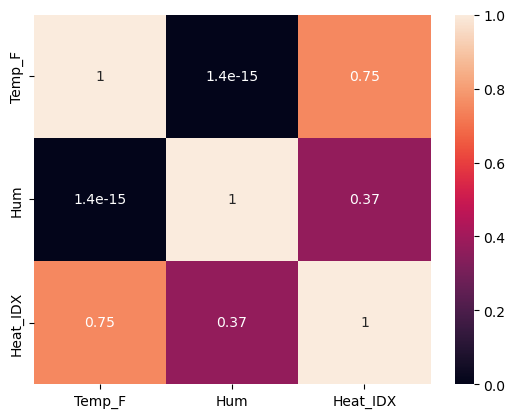

In [9]:
sns.heatmap(df.corr(), annot=True)

In [10]:
import tensorflow as tf
import keras

In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(2),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'relu')
    ])

In [13]:
X, y = df.drop("Heat_IDX", axis = 1), df["Heat_IDX"]

In [14]:
from sklearn.model_selection import train_test_split as tts

In [15]:
train_X, test_X, train_y, test_y = tts(X, y, test_size = 0.2)

In [17]:
train_X

,Temp_F,Hum
3868,125.6,98
4431,138.2,31
594,60.8,64
3155,113.0,15
2051,89.6,81
...,...,...
786,64.4,76
3764,123.8,84
1931,87.8,51
2269,95.0,29


In [18]:
opt = tf.keras.optimizers.Adam(learning_rate = 0.003)

In [20]:
model.compile(loss = "mean_squared_error", optimizer = opt, metrics = ["Accuracy"])

In [48]:
model.fit(train_X, train_y, epochs = 20)

Epoch 1/20
113/113 [==============================] - 0s 2ms/step - loss: 2.9857 - Accuracy: 0.0000e+00
Epoch 2/20
113/113 [==============================] - 0s 2ms/step - loss: 3.3967 - Accuracy: 0.0000e+00
Epoch 3/20
113/113 [==============================] - 0s 2ms/step - loss: 8.7623 - Accuracy: 0.0000e+00
Epoch 4/20
113/113 [==============================] - 0s 3ms/step - loss: 12.6326 - Accuracy: 0.0000e+00
Epoch 5/20
113/113 [==============================] - 0s 2ms/step - loss: 9.3061 - Accuracy: 0.0000e+00
Epoch 6/20
113/113 [==============================] - 0s 3ms/step - loss: 29.2565 - Accuracy: 0.0000e+00
Epoch 7/20
113/113 [==============================] - 0s 2ms/step - loss: 17.9866 - Accuracy: 0.0000e+00
Epoch 8/20
113/113 [==============================] - 0s 2ms/step - loss: 12.5303 - Accuracy: 0.0000e+00
Epoch 9/20
113/113 [==============================] - 0s 2ms/step - loss: 11.0828 - Accuracy: 0.0000e+00
Epoch 10/20
113/113 [==============================] - 0s 2

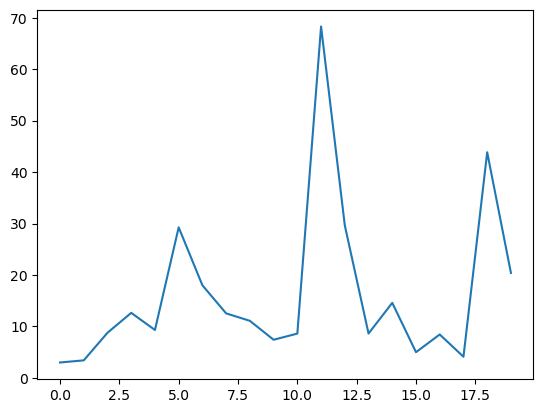

In [49]:
plt.plot(model.history.history["loss"])

In [50]:
pre = model.predict(test_X)

29/29 [==============================] - 0s 1ms/step


In [51]:
from sklearn.metrics import mean_squared_error

In [52]:
mean_squared_error(pre, test_y, squared=False)

3.2805932896542407

In [73]:
plt.plot?

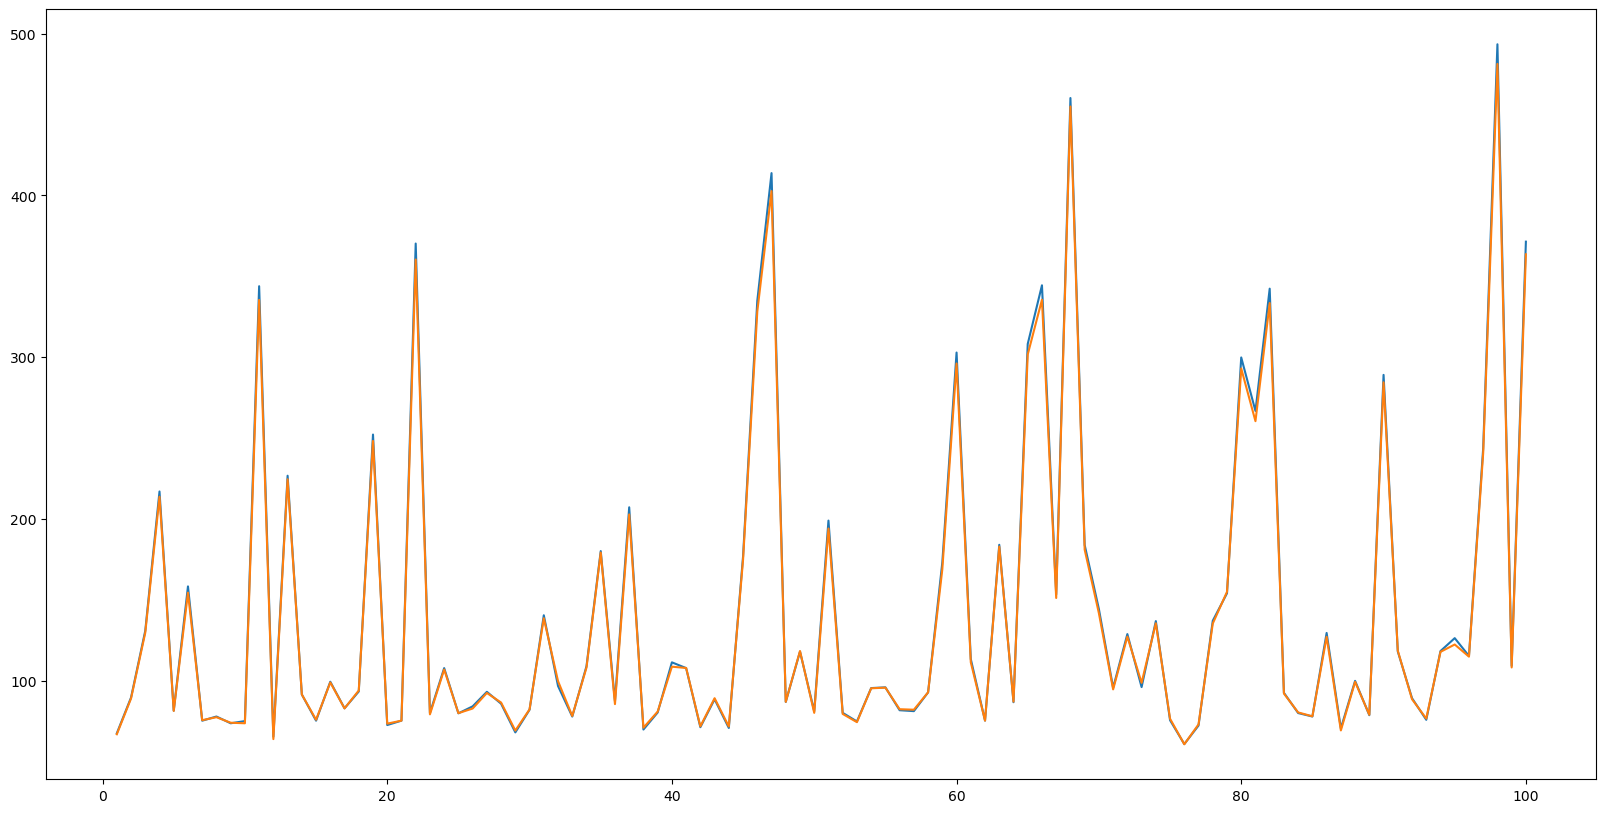

In [74]:
plt.figure(figsize=(20, 10))
plt.plot(range(1, 101), pre[300:400])
plt.plot(range(1, 101), test_y[300:400])

In [55]:
test_y

3103    162.458470
1138     74.781878
1251     71.045260
3635    191.060393
2053    114.220788
           ...    
3108    172.732771
2438     95.099988
2451    100.488409
3922    280.533092
931      77.412180
Name: Heat_IDX, Length: 900, dtype: float64

In [136]:
# Convert the model to the TensorFlow Lite format without quantization
converter_1 = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter_1.convert()

# Save the model to disk
open("hi_model.tflite", "wb").write(tflite_model)

# Convert the model to the TensorFlow Lite format with quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model)
# Indicate that we want to perform the default optimizations,
# which include quantization
converter.optimizations = [tf.lite.Optimize.DEFAULT]
# Define a generator function that provides our test data's x values
# as a representative dataset, and tell the converter to use it
def representative_dataset_generator():
  for value in np.asarray(test_X):
    # Each scalar value must be inside of a 2D array that is wrapped in a list
    yield [np.array(value, dtype=np.float32, ndmin=2)]
converter.representative_dataset = representative_dataset_generator
# Convert the model
tflite_model = converter.convert()

# Save the model to disk
open("hi_model_quantized.tflite", "wb").write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\Rohan\AppData\Local\Temp\tmp8c716v2l\assets


INFO:tensorflow:Assets written to: C:\Users\Rohan\AppData\Local\Temp\tmp8c716v2l\assets


INFO:tensorflow:Assets written to: C:\Users\Rohan\AppData\Local\Temp\tmpb9edfvm5\assets


INFO:tensorflow:Assets written to: C:\Users\Rohan\AppData\Local\Temp\tmpb9edfvm5\assets
D:\FolderA\Anaconda\lib\site-packages\tensorflow\lite\python\convert.py:765: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


5160

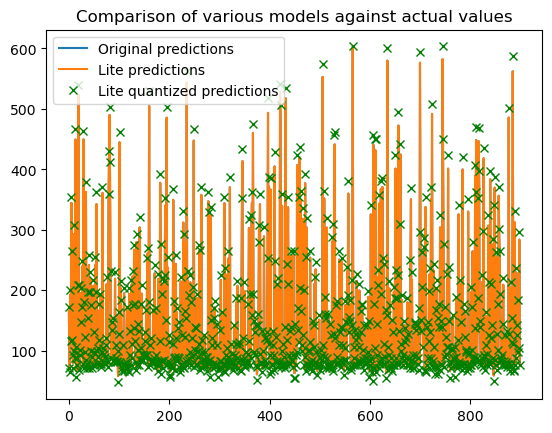

In [154]:
# Instantiate an interpreter for each model
sine_model = tf.lite.Interpreter('hi_model.tflite')
sine_model_quantized = tf.lite.Interpreter('hi_model_quantized.tflite')

# Allocate memory for each model
sine_model.allocate_tensors()
sine_model_quantized.allocate_tensors()

# Get indexes of the input and output tensors
sine_model_input_index = sine_model.get_input_details()[0]["index"]
sine_model_output_index = sine_model.get_output_details()[0]["index"]
sine_model_quantized_input_index = sine_model_quantized.get_input_details()[0]["index"]
sine_model_quantized_output_index = sine_model_quantized.get_output_details()[0]["index"]

# Create arrays to store the results
sine_model_predictions = []
sine_model_quantized_predictions = []

# Run each model's interpreter for each value and store the results in arrays
for x_value in np.asarray(test_X):
  # Create a 2D tensor wrapping the current x value
  x_value_tensor = tf.convert_to_tensor([x_value], dtype=np.float32)
  # Write the value to the input tensor
  sine_model.set_tensor(sine_model_input_index, x_value_tensor)
  # Run inference
  sine_model.invoke()
  # Read the prediction from the output tensor
  sine_model_predictions.append(sine_model.get_tensor(sine_model_output_index)[0])
  # Do the same for the quantized model
  sine_model_quantized.set_tensor(sine_model_quantized_input_index, x_value_tensor)
  sine_model_quantized.invoke()
  sine_model_quantized_predictions.append(sine_model_quantized.get_tensor(sine_model_quantized_output_index)[0])


# See how they line up with the data
plt.clf()
x_test = list(range(0, len(pre)))
y_test = test_y
plt.title('Comparison of various models against actual values')
plt.plot(list(range(0, len(pre))), pre, label='Original predictions')
plt.plot(x_test, sine_model_predictions, label='Lite predictions')
plt.plot(x_test, sine_model_quantized_predictions,"gx", label='Lite quantized predictions')
plt.legend()
plt.show()

In [161]:
import os
basic_model_size = os.path.getsize("hi_model.tflite")
print("Basic model is %d bytes" % basic_model_size)
quantized_model_size = os.path.getsize("hi_model_quantized.tflite")
print("Quantized model is %d bytes" % quantized_model_size)
difference = basic_model_size - quantized_model_size
print("Difference is %d bytes" % difference)

Basic model is 10968 bytes
Quantized model is 5160 bytes
Difference is 5808 bytes


In [156]:
def hex_to_c_array(hex_data, var_name): 
    c_str = '' # Create header guard 
    c_str += '#ifndef ' + var_name.upper() + '_H\n' 
    c_str += '#define ' + var_name.upper() + '_H\n\n' # Add array length at top of file 
    c_str += '\nunsigned int ' + var_name + '_len = ' + str(len(hex_data)) + ';\n' # Declare C variable 
    c_str += 'unsigned char ' + var_name + '[] = {' 
    hex_array = [] 
    for i, val in enumerate(hex_data) : # Construct string from hex 
        hex_str = format(val, '#04x') # Add formatting so each line stays within 80 characters 
        if (i + 1) < len(hex_data): 
            hex_str += ',' 
        if (i + 1) % 12 == 0: 
            hex_str += '\n ' 
        hex_array.append(hex_str) # Add closing brace 
    c_str += '\n ' + format(' '.join(hex_array)) + '\n};\n\n' # Close out header guard 
    c_str += '#endif //' + var_name.upper() + '_H' 
    return c_str

In [162]:
with open(r"C:/Users/Rohan/Downloads/hi_index_q" + '.h', 'w') as file:
  file.write(hex_to_c_array(tflite_model, "hi_index_q"))

In [159]:
hex_to_c_array(tflite_model, 'hi_index_tflite')

'#ifndef HI_INDEX_TFLITE_H\n#define HI_INDEX_TFLITE_H\n\n\nunsigned int hi_index_tflite_len = 5160;\nunsigned char hi_index_tflite[] = {\n 0x20, 0x00, 0x00, 0x00, 0x54, 0x46, 0x4c, 0x33, 0x00, 0x00, 0x00, 0x00,\n  0x14, 0x00, 0x20, 0x00, 0x1c, 0x00, 0x18, 0x00, 0x14, 0x00, 0x10, 0x00,\n  0x0c, 0x00, 0x00, 0x00, 0x08, 0x00, 0x04, 0x00, 0x14, 0x00, 0x00, 0x00,\n  0x1c, 0x00, 0x00, 0x00, 0x80, 0x00, 0x00, 0x00, 0xd8, 0x00, 0x00, 0x00,\n  0x04, 0x0c, 0x00, 0x00, 0x14, 0x0c, 0x00, 0x00, 0x9c, 0x13, 0x00, 0x00,\n  0x03, 0x00, 0x00, 0x00, 0x01, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00,\n  0xaa, 0xf3, 0xff, 0xff, 0x0c, 0x00, 0x00, 0x00, 0x1c, 0x00, 0x00, 0x00,\n  0x38, 0x00, 0x00, 0x00, 0x0f, 0x00, 0x00, 0x00, 0x73, 0x65, 0x72, 0x76,\n  0x69, 0x6e, 0x67, 0x5f, 0x64, 0x65, 0x66, 0x61, 0x75, 0x6c, 0x74, 0x00,\n  0x01, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00, 0x9c, 0xff, 0xff, 0xff,\n  0x0b, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00, 0x07, 0x00, 0x00, 0x00,\n  0x64, 0x65, 0x6e, 0x73, 0x65, 0x5f, 